In [4]:
import matplotlib.pyplot as plt
import pytorch_lightning as pl
import torch
import yaml

from data.brain_mri_dataset import BrainMRI_Train, BrainMRI_Eval
from data.brain_mri_lightning import BrainMri_Train_Lightning, BrainMri_Eval_Lightning
# autoreload imported modules
%load_ext autoreload
%autoreload 2

2023-11-22 18:18:51.414556: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-22 18:18:51.414597: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-22 18:18:51.414631: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-22 18:18:51.426630: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-22 18:18:52.597733: W tensorflow/compiler/

In [2]:
train_data_module = BrainMri_Train_Lightning(
    split_dir="/home/mamur/TUM/MLMI/data/splits",
    crop_size=(128,128),
    batch_size=5)

train_data_module.setup(stage=None)


In [3]:
# Plot some images
batch = next(iter(train_data_module.train_dataloader()))

# Print statistics
print(f"Batch shape: {batch.shape}")
print(f"Batch min: {batch.min()}")
print(f"Batch max: {batch.max()}")

/home/mamur/miniconda3/envs/adlm/lib/python3.9/site-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 12, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Batch shape: torch.Size([5, 3, 128, 128])
Batch min: 0.0
Batch max: 1.0


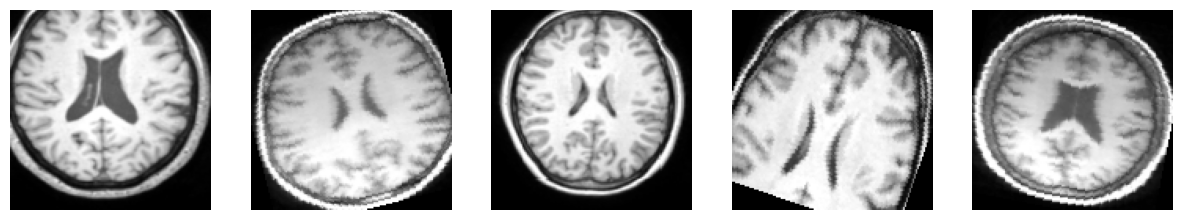

In [4]:
fig, ax = plt.subplots(1, 5, figsize=(15, 10))
for i in range(5):
    # Assuming batch[i] is a tensor in the format (C, H, W)
    # Convert it to (H, W, C) for displaying
    img = batch[i].permute(1, 2, 0).numpy()
    # Display the image without any colormap (assumes img is already in the RGB format)
    ax[i].imshow(img)
    ax[i].axis('off')
plt.show()


In [15]:
from utils.environment_settings import env_settings

In [16]:
env_settings._N_FEATURES_DEFAULTS

{'resnet18': 100, 'wide_resnet50_2': 550}

env_settings._N

In [7]:
from models.backbone import FeatureExtractor, find_featuremap_dims, get_feature_dims

In [8]:
feature_extractor = FeatureExtractor(
    backbone="resnet18",
    layers = ["layer1", "layer2", "layer3"],
    pre_trained=True
)

In [9]:
n_features_original, n_patches = get_feature_dims(
    feature_extractor,
    input_size=(128,128),
    layers=["layer1", "layer2", "layer3"],
)

torch.Size([1, 3, 128, 128])


In [10]:
n_features_original

448

In [11]:
n_patches

1024

In [5]:
from models.PaDiM import PaDiM

In [6]:
input_tensor = torch.randn(1, 3, 128, 128)

In [8]:
padim_model = PaDiM(
    input_size=(128, 128),
    layers=['layer1', 'layer2', 'layer3'],
    backbone='resnet18',
)

In [9]:
# Pass the tensor through the model
output = padim_model(input_tensor)

In [10]:

# Check the output
print("Output shape:", output.shape)

Output shape: torch.Size([1, 1, 128, 128])


In [11]:
len(output)

1